In [33]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [34]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
# from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [35]:
path_to_model='./results/model_v1_inceptionV3.h5'
print("Loading the model..")
model = tf.keras.models.load_model(path_to_model)
print("Done!")
# Loading the model..
# Done!

Loading the model..
Done!


In [41]:
from keras.preprocessing.image import ImageDataGenerator
n_classes = 20
batch_size = 32
img_width, img_height = 299, 299
test_data_dir = './test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 585 images belonging to 20 classes.


In [42]:
category={
    0: ['burger','Burger'], 1: ['butter_naan','Butter Naan'], 2: ['chai','Chai'],
    3: ['chapati','Chapati'], 4: ['chole_bhature','Chole Bhature'], 5: ['dal_makhani','Dal Makhani'],
    6: ['dhokla','Dhokla'], 7: ['fried_rice','Fried Rice'], 8: ['idli','Idli'], 9: ['jalegi','Jalebi'],
    10: ['kathi_rolls','Kaathi Rolls'], 11: ['kadai_paneer','Kadai Paneer'], 12: ['kulfi','Kulfi'],
    13: ['masala_dosa','Masala Dosa'], 14: ['momos','Momos'], 15: ['paani_puri','Paani Puri'],
    16: ['pakode','Pakode'], 17: ['pav_bhaji','Pav Bhaji'], 18: ['pizza','Pizza'], 19: ['samosa','Samosa']
}

def predict_image(filename,model):
    img_ =  keras.utils.load_img(filename, target_size=(299, 299))
    img_array = tf.keras.utils.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

In [43]:
import keras
from keras.preprocessing import image

1/1 [==============================] - 0s 136ms/step


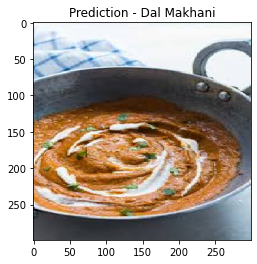

In [44]:
predict_image('food.jpg',model)
